In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок


math = pd.read_csv('stud_math.xls')

In [6]:
display(math.head(10))
math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [12]:
#В датасете 395 строчек и 30 столбцов

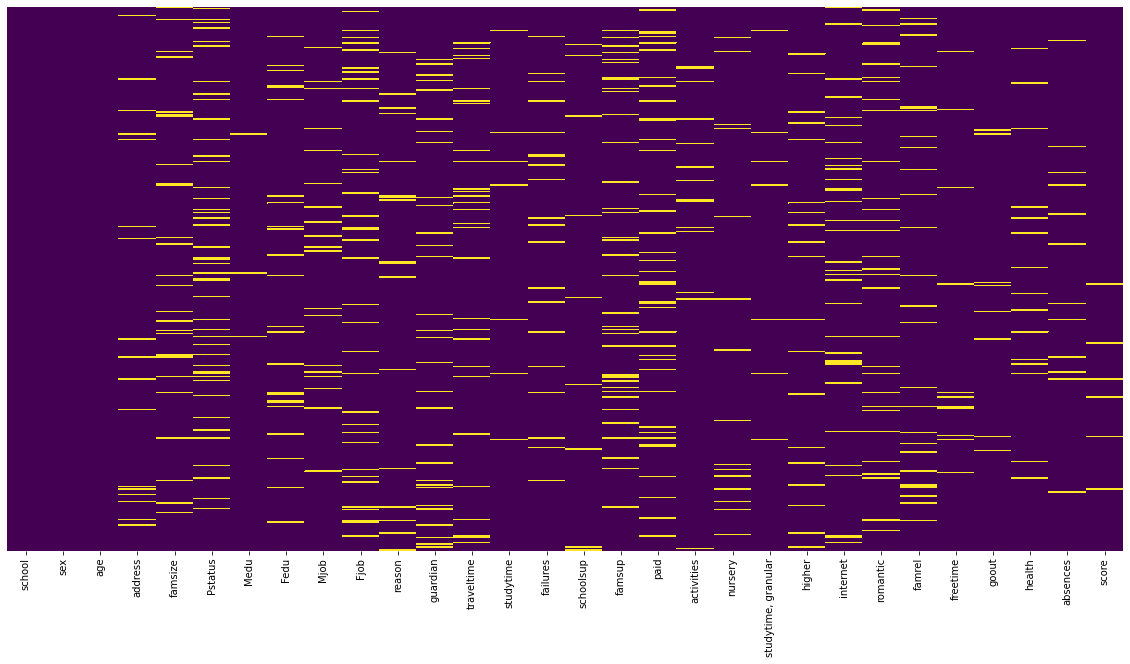

In [9]:
plt.figure(figsize=(20, 10))
sns.heatmap(math.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [10]:
math.nunique()

school                  2
sex                     2
age                     8
address                 2
famsize                 2
Pstatus                 2
Medu                    5
Fedu                    6
Mjob                    5
Fjob                    5
reason                  4
guardian                3
traveltime              4
studytime               4
failures                4
schoolsup               2
famsup                  2
paid                    2
activities              2
nursery                 2
studytime, granular     4
higher                  2
internet                2
romantic                2
famrel                  6
freetime                5
goout                   5
health                  5
absences               36
score                  18
dtype: int64

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

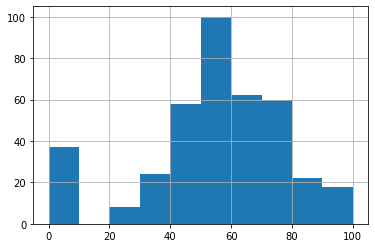

In [11]:
math.score.hist()
math.score.describe()

In [13]:
math[math.score == 0].describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,37.000000,36.000000,34.000000,32.000000,37.000000,35.000000,37.000000,34.000000,36.000000,36.000000,35.000000,36.0,37.0
mean,17.054054,2.333333,2.323529,1.500000,1.945946,0.857143,-5.837838,3.823529,3.111111,3.166667,3.657143,0.0,0.0
std,1.311190,1.041976,1.147344,0.718421,0.911225,1.033067,2.733674,1.028992,0.887300,1.341641,1.304807,0.0,0.0
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-12.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0
25%,16.000000,1.750000,1.000000,1.000000,1.000000,0.000000,-6.000000,3.000000,3.000000,2.000000,3.000000,0.0,0.0
50%,17.000000,2.000000,2.000000,1.000000,2.000000,1.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,0.0,0.0
75%,18.000000,3.000000,3.000000,2.000000,2.000000,1.000000,-3.000000,4.750000,4.000000,4.000000,5.000000,0.0,0.0
max,19.000000,4.000000,4.000000,3.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,0.0,0.0


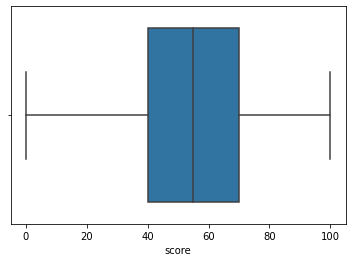

In [14]:
sns.boxplot(x='score', data=math)

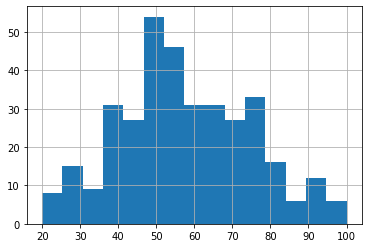

In [15]:
math['zero_result'] = math.score.apply(
    lambda x: None if pd.isnull(x) else 1 if x == 0 else 0)
math_0 = math.score.apply(lambda x: x if x > 0 else np.nan)
math.loc[math['score'] == 0.0, 'score'] = np.nan
math.score.hist(bins=15)

In [16]:
# напишем функицю, который отображает столбец и информацию о нём
def get_info(col):

    display(pd.DataFrame(math[col].value_counts().head(10)))
    math.loc[:, [col]].info()

In [17]:
# Проверим столбец studytime и studytime, granular
get_info('studytime')
get_info('studytime, granular')

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studytime, granular  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [18]:
math['studytime'].corr(math['studytime, granular'])

-1.0

In [19]:
math.drop(['studytime, granular'], inplace=True, axis=1)

In [20]:
display(math.loc[:, ['studytime']].head(10))
math.loc[:, ['studytime']].info()
display(pd.DataFrame(math.studytime.value_counts()))

,studytime
0,2.0
1,2.0
2,2.0
3,3.0
4,2.0
5,2.0
6,2.0
7,2.0
8,2.0
9,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


In [21]:
# В данных 7 пропусков. Посмотрим на моду и медиану этого столбца
math.studytime.median()
# мода - наиболее часто встречающееся значение в данных. В нашем случае она тоже 2.
# По итогу, мода и медиана совпадают, поэтому заменяем пропущенные значения на медиану
math.loc[pd.isnull(math['studytime']),
         'studytime'] = math['studytime'].median()
get_info('studytime')

,studytime
2.0,201
1.0,103
3.0,64
4.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [22]:
# Посмотрим тебе на столбец про школы
get_info('school')

,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [23]:
# Посмотрим на столбец Fedu
get_info('Fedu')

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [24]:
math.loc[math['Fedu'] == 40.0, 'Fedu'] = 4.0
get_info('Fedu')

,Fedu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [25]:
math.Fedu.median()

2.0

In [26]:
math.loc[pd.isnull(math['Fedu']), 'Fedu'] = math['Fedu'].median()
get_info('Fedu')

,Fedu
2.0,130
3.0,96
4.0,89
1.0,78
0.0,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [27]:
get_info('Medu')

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [28]:

# Посмотрим на медиану
math.Medu.median()

3.0

In [29]:
# Заполним эти 3 пропуска медианой
math.loc[pd.isnull(math['Medu']), 'Medu'] = math['Medu'].median()
get_info('Medu')

,Medu
4.0,131
2.0,102
3.0,100
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [30]:
# Посмотрим на столбец Mjob
get_info('Mjob')

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [31]:
# Для номинальных переменных уже нельзя заполнять пропуски медианой. Вообще, для таких переменных придумать способ
# заполнения пропусков это отдельное искусство. Попробуем заполнить модой, т.е. значением other
math.loc[pd.isnull(math['Mjob']), 'Mjob'] = 'other'
get_info('Mjob')

,Mjob
other,152
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [32]:
get_info('Fjob')

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [33]:
# Попробуем аналогично заполнить пропуски столбцом 'other'
math.loc[pd.isnull(math['Fjob']), 'Fjob'] = 'other'
get_info('Fjob')

,Fjob
other,233
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [34]:
# Посмотрим на столбец reason
get_info('reason')

,reason
course,137
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [35]:
# Тут уже сложнее будет заполнить пропуски, т.к. первые 3 значения встречаются довольно часто, а пропусков 17
# Попробуем всё-таки заполнить модой
math.loc[pd.isnull(math['reason']), 'reason'] = 'course'
get_info('reason')

,reason
course,154
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [36]:
# Посмотрим на столбец guardian
get_info('guardian')

,guardian
mother,250
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [37]:
# Тут пропусков 31, но слишком много значения mother по сравнению с остальными
# Есть желание заполнить пропуски модой. Так и сделаем
math.loc[pd.isnull(math['guardian']), 'guardian'] = 'mother'
get_info('guardian')

,guardian
mother,281
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [38]:
# Посмотрим на столбец traveltime
get_info('traveltime')

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [39]:
# Хочется заполнить всё медианой, т.к. очевидно, что 1.0 сильно преобладает в выборке, но для формальности
# посчитаем медиану
math.traveltime.median()

1.0

In [40]:
# заполняем модой
math.loc[pd.isnull(math['traveltime']), 'traveltime'] = 1.0
get_info('traveltime')

,traveltime
1.0,270
2.0,96
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [41]:
get_info('failures')

,failures
0.0,293
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [42]:
# Заполним также модой
math.loc[pd.isnull(math['failures']), 'failures'] = 0.0
get_info('failures')

,failures
0.0,315
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [43]:
get_info('famrel')

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [44]:
math.loc[math['famrel'] == -1.0, 'famrel'] = 1.0
get_info('famrel')

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [45]:
# Заполним пропуски модой
math.loc[pd.isnull(math['famrel']), 'famrel'] = 4.0
get_info('famrel')

,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [46]:
get_info('freetime')

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [47]:
# Посмотрим на медиану
math.freetime.median()

3.0

In [48]:
# Заполним пропуски медаиной
math.loc[pd.isnull(math['freetime']), 'freetime'] = math['freetime'].median()
get_info('freetime')

,freetime
3.0,164
4.0,112
2.0,63
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [49]:
get_info('goout')

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [50]:
# Пропусков у нас мало, заполним всё медианой
math.loc[pd.isnull(math['goout']), 'goout'] = math['goout'].median()
get_info('goout')

,goout
3.0,135
2.0,101
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [51]:
get_info('health')

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [52]:
math.loc[pd.isnull(math['health']), 'health'] = math['health'].median()
get_info('health')

,health
5.0,138
3.0,89
4.0,78
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [53]:
get_info('age')

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


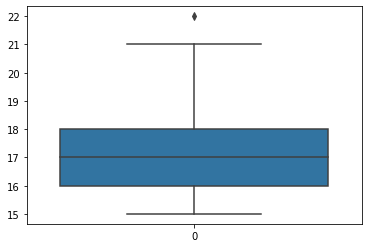

In [54]:
math.age.value_counts()
sns.boxplot(data=math.age)

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


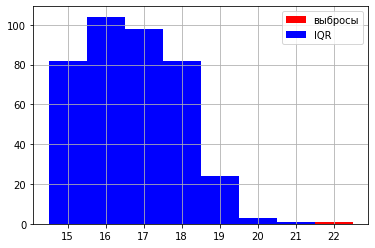

In [55]:
median = math.age.median()
IQR = math.age.quantile(0.75) - math.age.quantile(0.25)
perc25 = math.age.quantile(0.25)
perc75 = math.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


math.age.loc[math.age <= 22].hist(bins=8,
                                  range=(14.5, 22.5),
                                  color='red',
                                  label='выбросы')

math.age.loc[math.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=8,
                                                                        range=(
                                                                            14.5, 22.5),
                                                                        color='blue',
                                                                        label='IQR')

plt.legend()

,age
16.0,104
17.0,98
15.0,82
18.0,82
19.0,24
20.0,3
21.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     394 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


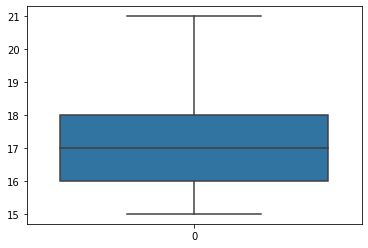

In [56]:
# Получается, возраст 22 действительно выброс. Уберём его из данных
math.loc[math['age'] == 22.0, 'age'] = np.nan
get_info('age')
math.age.describe()
sns.boxplot(data=math.age)

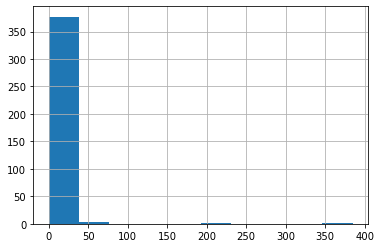

In [57]:
math.absences.hist()

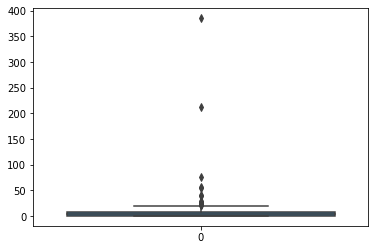

In [58]:
sns.boxplot(data=math.absences)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


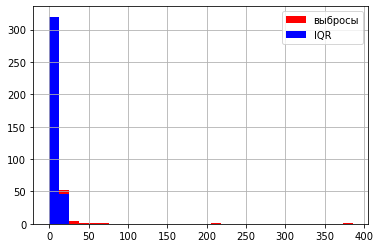

In [59]:
median = math.absences.median()
IQR = math.absences.quantile(0.75) - math.absences.quantile(0.25)
perc25 = math.absences.quantile(0.25)
perc75 = math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


math.absences.loc[math.absences <= 385].hist(bins=30,
                                             range=(-1, 386),
                                             color='red',
                                             label='выбросы')

math.absences.loc[math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=30,
                                                                                  range=(-1,
                                                                                         386),
                                                                                  color='blue',
                                                                                  label='IQR')

plt.legend()

In [60]:
math.absences.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  366 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


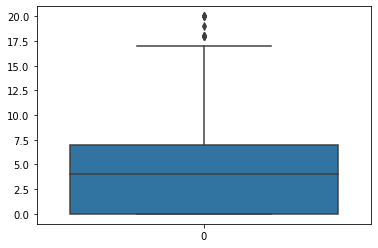

In [61]:
# Очень большая разница между 75% квартилем и максимумом, а также среднее и дисперсия сильно рзличаются.
# Избавимся от выбросов
math.loc[math['absences'] > 20.0, 'absences'] = np.nan
get_info('absences')
math.absences.describe()
sns.boxplot(data=math.absences)

In [62]:
math.loc[pd.isnull(math['absences']), 'absences'] = math['absences'].median()
get_info('absences')

,absences
0.0,111
4.0,82
2.0,60
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [63]:
replacement_list = []
list_of_binary_columns = ['sex', 'address', 'famsize', 'Pstatus',
                          'schoolsup', 'famsup', 'paid', 'activities',
                          'nursery', 'higher', 'internet', 'romantic']

In [64]:
for elem in list_of_binary_columns:
    a = math[elem].unique()
    a = a[~pd.isnull(a)]
    if len(a) == 2:
        replacement_list.append([a[0], a[1]])
    else:
        print(
            f"со столбцом {elem} произошла ошибка. Уникальные значения: math[elem].values")
replacement_list

[['F', 'M'],
 ['U', 'R'],
 ['GT3', 'LE3'],
 ['A', 'T'],
 ['yes', 'no'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['no', 'yes']]

In [65]:
replacement_list[5] = ['yes', 'no']
replacement_list

[['F', 'M'],
 ['U', 'R'],
 ['GT3', 'LE3'],
 ['A', 'T'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['no', 'yes']]

In [66]:
math[list_of_binary_columns].describe()

,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,378,368,350,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,2,2,2,2,2,2,2
top,F,U,GT3,T,no,yes,no,yes,yes,yes,yes,no
freq,208,295,261,314,335,219,200,195,300,356,305,240


In [67]:
395 - math[list_of_binary_columns].describe().T['count']

sex            0
address       17
famsize       27
Pstatus       45
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
Name: count, dtype: object

In [70]:
get_info('address')

,address
U,295
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [71]:
# У меня есть подозрение, что между типом адреса студента и время пути до школы существует связь
# Если студент из сельской местности, то ему дольше идти до школы, а городскому меньше. Посмотрим, так ли это
math.groupby(['address']).traveltime.mean()

address
R    1.746988
U    1.311864
Name: traveltime, dtype: float64

In [72]:
# Видно, что для сельского мальчика путь дольше, чем для городского. Заполним тогда так:
# Если traveltime == 1 или None, адрес заполняем значение U, в остальных случая R
math.loc[pd.isnull(math['address']), 'address'] \
    = math.traveltime.apply(lambda x: 'U' if pd.isnull(x) else 'U' if x == 1 else 'R')
get_info('address')

,address
U,306
R,89


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [73]:
get_info('famsize')

,famsize
GT3,261
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [74]:
# Здесь уже сложно найти взаимосвязь с другими параметрами, поэтому просто заменим пропуски модой
math.loc[pd.isnull(math['famsize']), 'famsize'] = 'GT3'
get_info('famsize')

,famsize
GT3,288
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [75]:
get_info('Pstatus')

,Pstatus
T,314
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [76]:
math.loc[pd.isnull(math['Pstatus']), 'Pstatus'] = 'T'
get_info('Pstatus')

,Pstatus
T,359
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [77]:
for col in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    display(pd.DataFrame(math[col].value_counts()))
    math.loc[:, [col]].info()

,schoolsup
no,335
yes,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,famsup
yes,219
no,137


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,paid
no,200
yes,155


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,activities
yes,195
no,186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,nursery
yes,300
no,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,higher
yes,356
no,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,internet
yes,305
no,56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,romantic
no,240
yes,124


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [78]:
math.loc[pd.isnull(math['schoolsup']), 'schoolsup'] = 'no'
math.loc[pd.isnull(math['famsup']), 'famsup'] = 'yes'
math.loc[pd.isnull(math['paid']), 'paid'] = 'no'
math.loc[pd.isnull(math['activities']), 'activities'] = 'yes'
math.loc[pd.isnull(math['nursery']), 'nursery'] = 'yes'
math.loc[pd.isnull(math['higher']), 'higher'] = 'yes'
math.loc[pd.isnull(math['internet']), 'internet'] = 'yes'
math.loc[pd.isnull(math['romantic']), 'romantic'] = 'no'

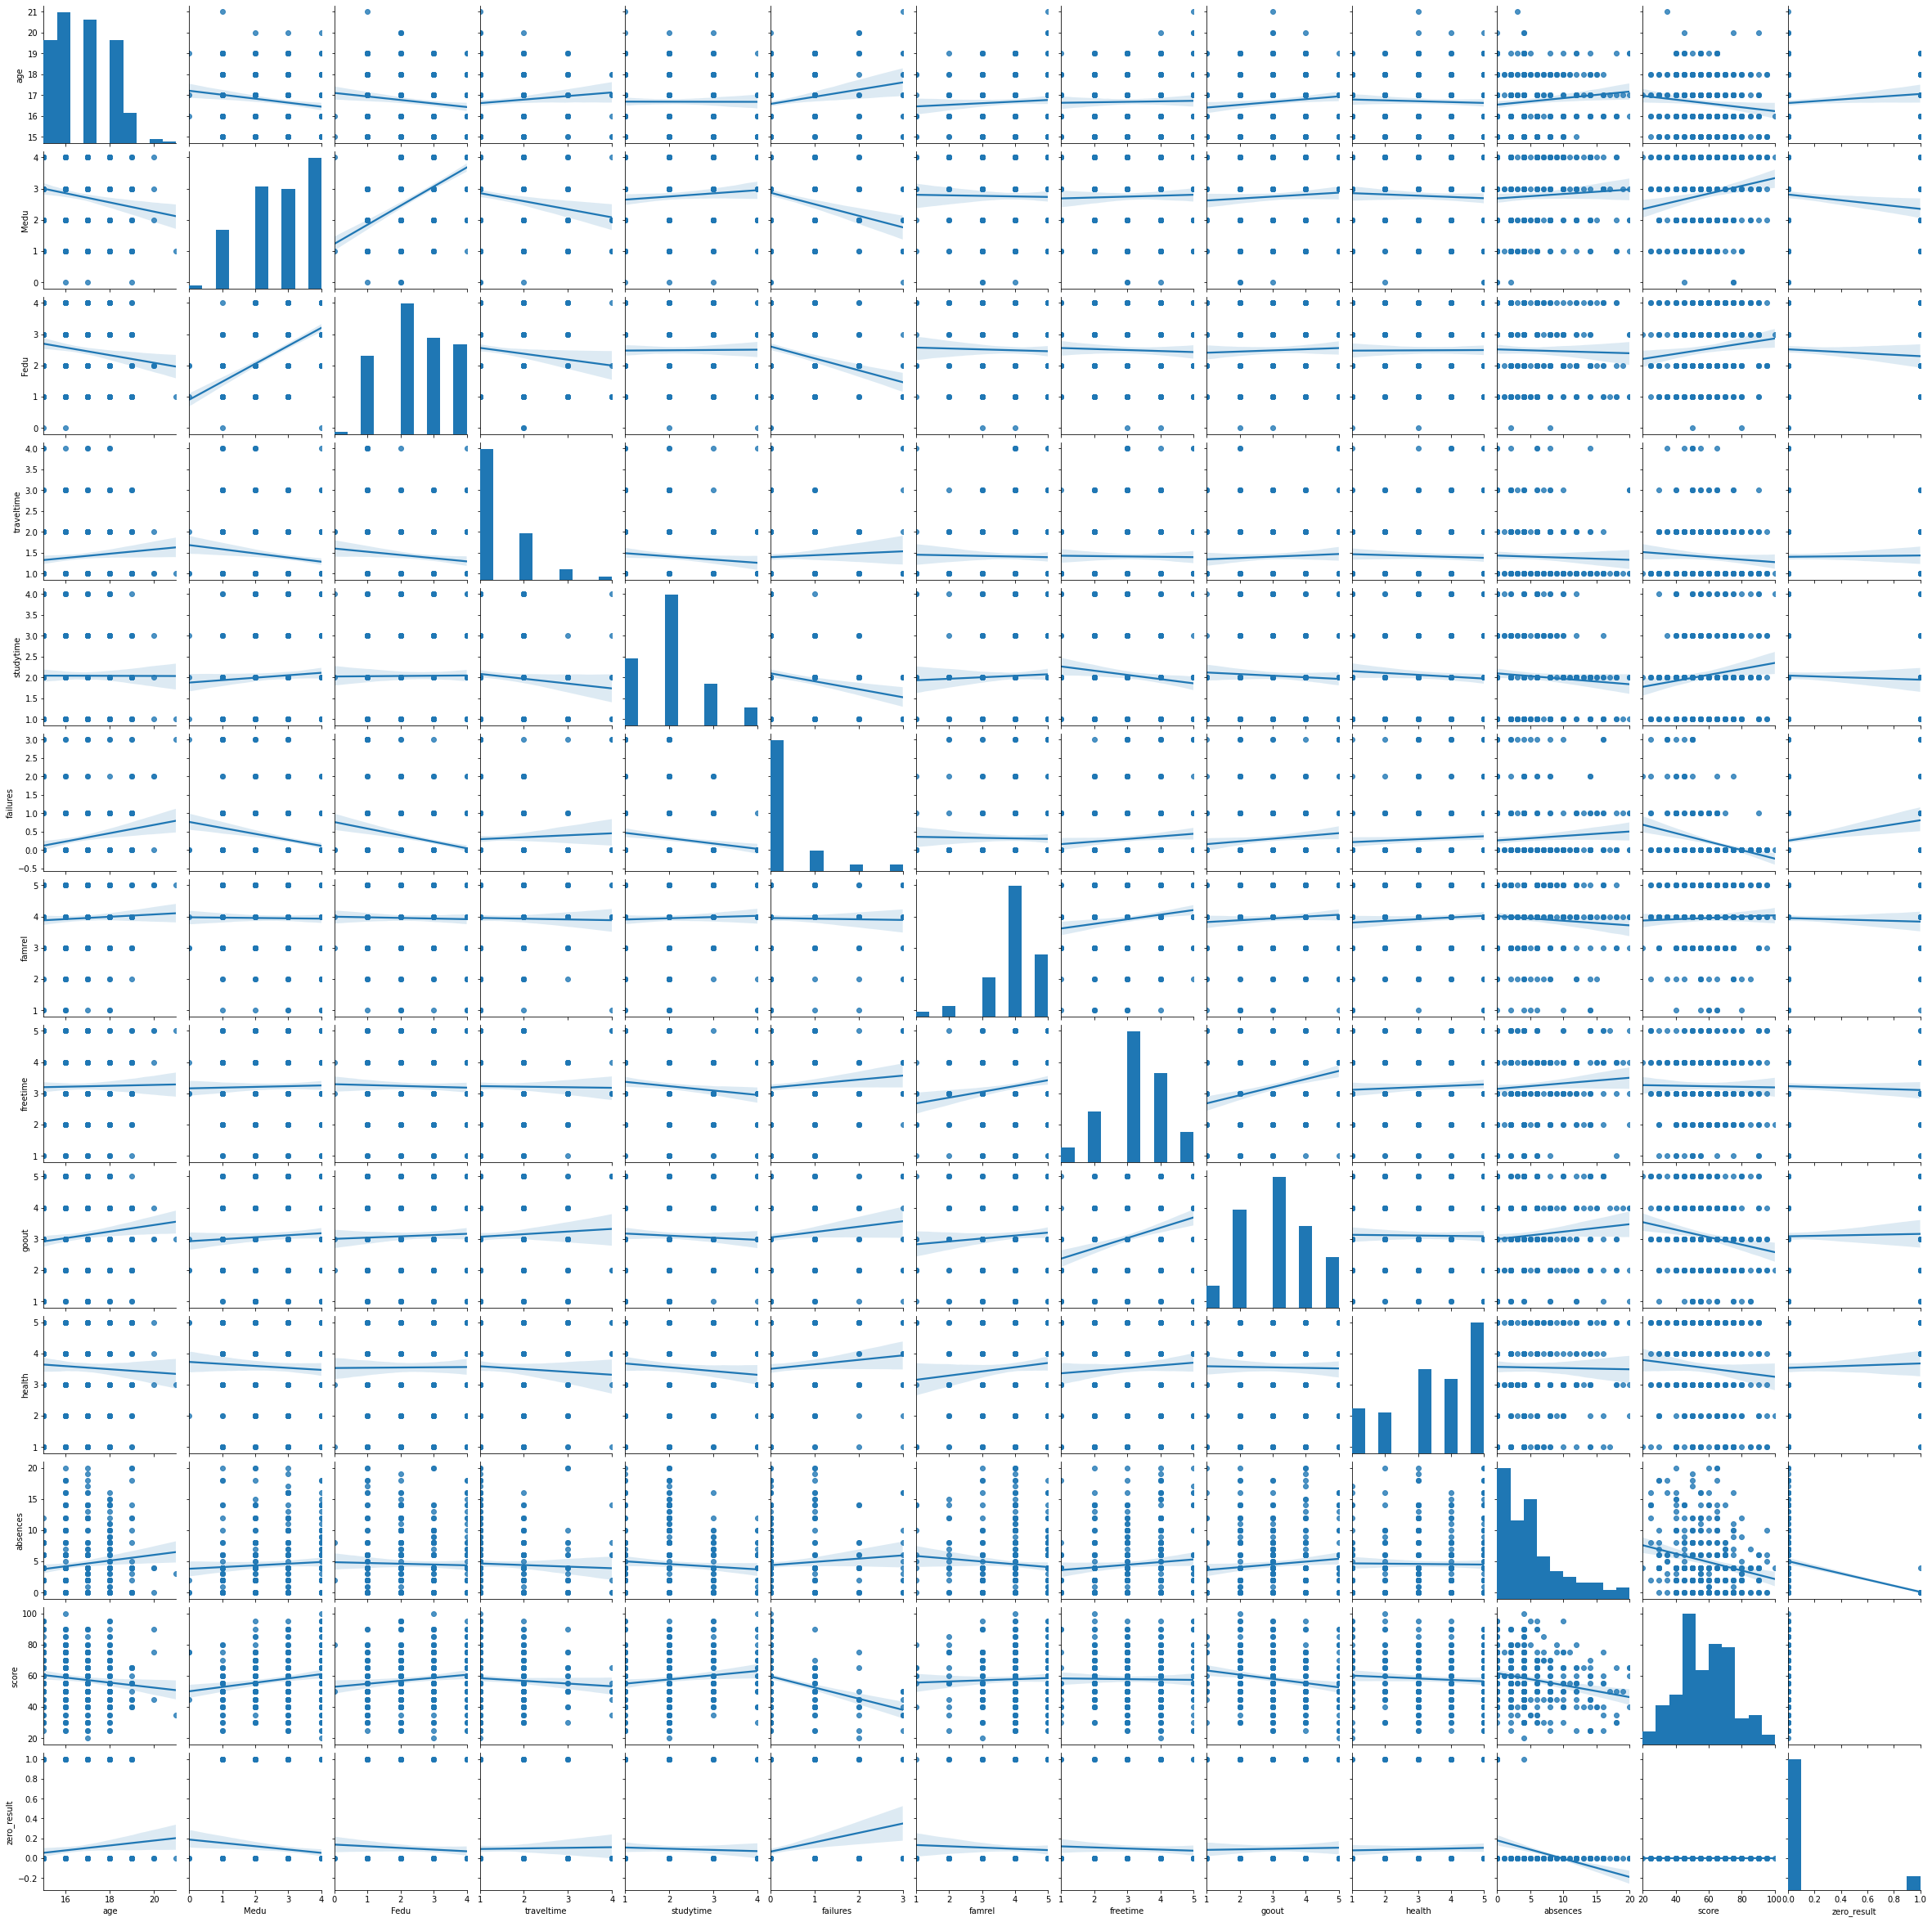

In [79]:
sns.pairplot(math, kind='reg')

In [80]:
cor = math.corr()
cor

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,zero_result
age,1.000000,-0.167507,-0.143527,0.093222,-0.002256,0.196777,0.053776,0.018514,0.118995,-0.045448,0.119265,-0.121579,0.103534
Medu,-0.167507,1.000000,0.593116,-0.160877,0.077050,-0.245110,-0.013853,0.026210,0.063361,-0.050991,0.062010,0.184533,-0.124252
Fedu,-0.143527,0.593116,1.000000,-0.120629,0.007754,-0.260690,-0.024077,-0.029868,0.039084,0.006132,-0.027690,0.125396,-0.060808
traveltime,0.093222,-0.160877,-0.120629,1.000000,-0.094637,0.049670,-0.019040,-0.012496,0.051775,-0.044842,-0.036046,-0.072435,0.013834
studytime,-0.002256,0.077050,0.007754,-0.094637,1.000000,-0.166598,0.037638,-0.119014,-0.051090,-0.073674,-0.074658,0.139605,-0.034816
failures,0.196777,-0.245110,-0.260690,0.049670,-0.166598,1.000000,-0.017230,0.094826,0.113649,0.075849,0.079299,-0.286925,0.228864
famrel,0.053776,-0.013853,-0.024077,-0.019040,0.037638,-0.017230,1.000000,0.165324,0.074217,0.085947,-0.081067,0.039036,-0.038190
freetime,0.018514,0.026210,-0.029868,-0.012496,-0.119014,0.094826,0.165324,1.000000,0.292305,0.060557,0.086704,-0.014731,-0.036483
goout,0.118995,0.063361,0.039084,0.051775,-0.051090,0.113649,0.074217,0.292305,1.000000,-0.014274,0.103337,-0.179913,0.020433
health,-0.045448,-0.050991,0.006132,-0.044842,-0.073674,0.075849,0.085947,0.060557,-0.014274,1.000000,-0.013697,-0.078860,0.030190


In [81]:
cor[cor > abs(0.7)]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,zero_result
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fedu,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traveltime,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studytime,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
failures,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famrel,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
freetime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
goout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [82]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 3))
    sns.boxplot(x=column, y='score',
                data=math.loc[math.loc[:, column].isin(
                    math.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

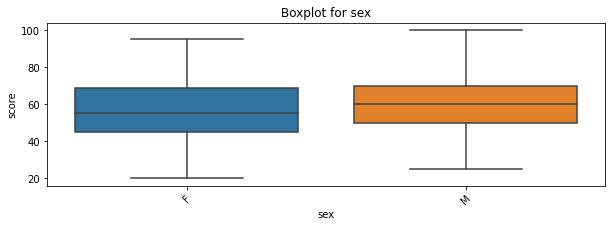

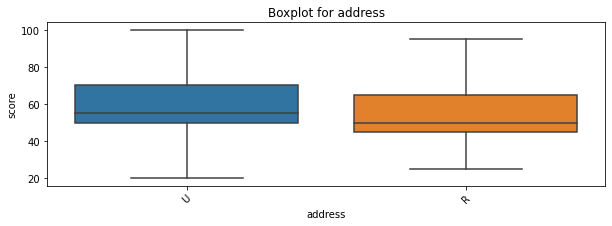

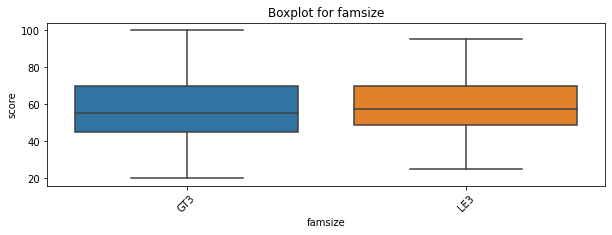

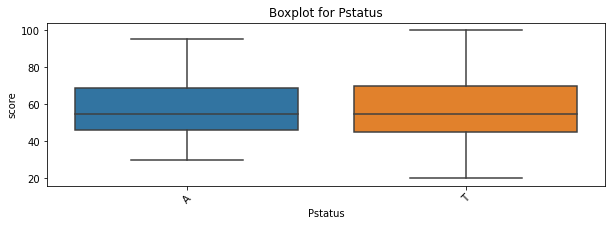

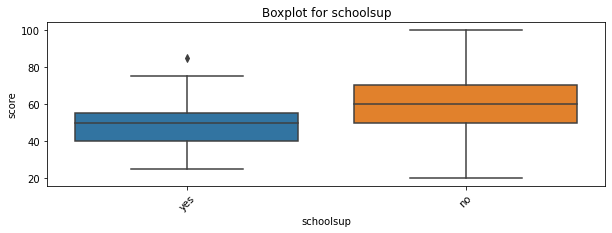

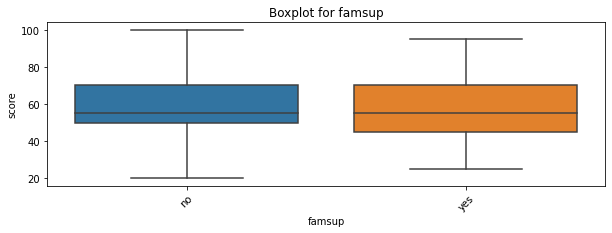

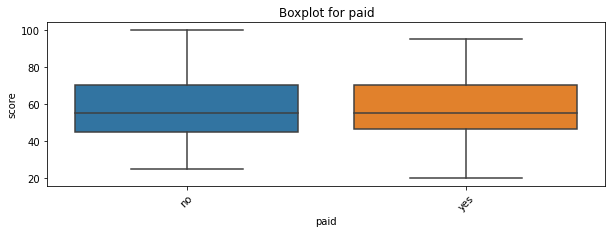

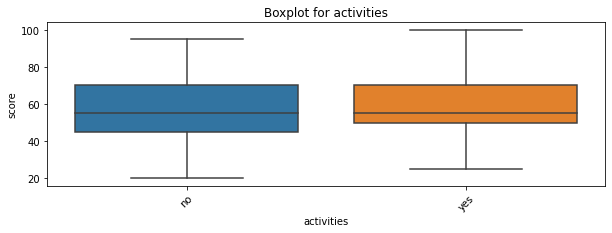

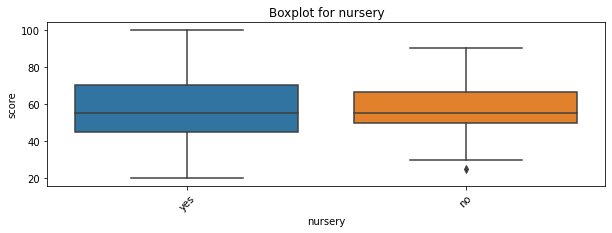

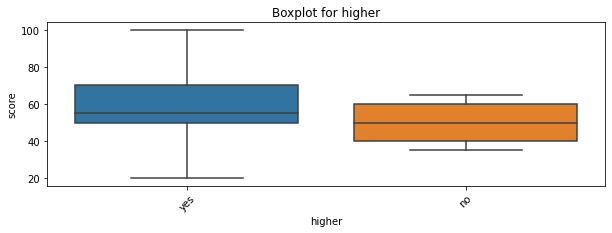

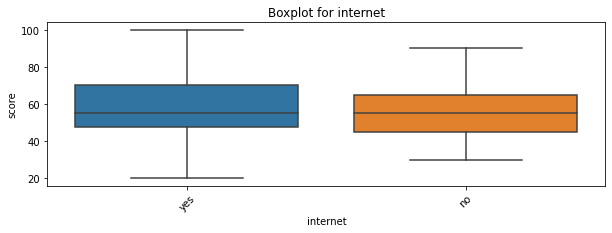

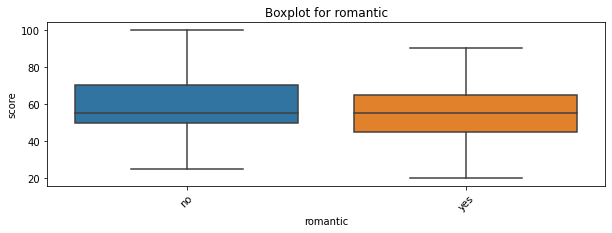

In [83]:
for col in list_of_binary_columns:
    get_boxplot(col)

In [84]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(12, 4))
    sns.boxplot(x=column, y='score',
                data=math.loc[math.loc[:, column].isin(
                    math.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

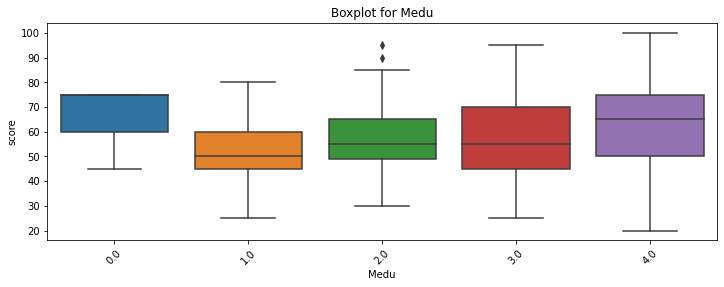

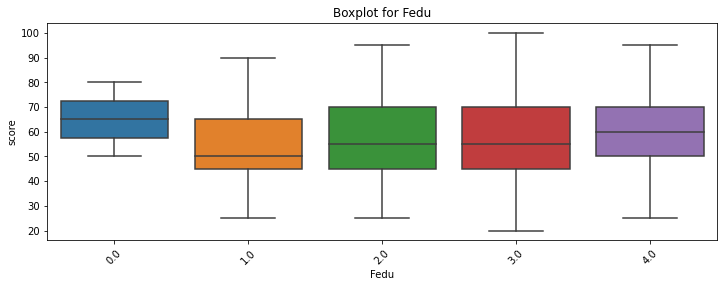

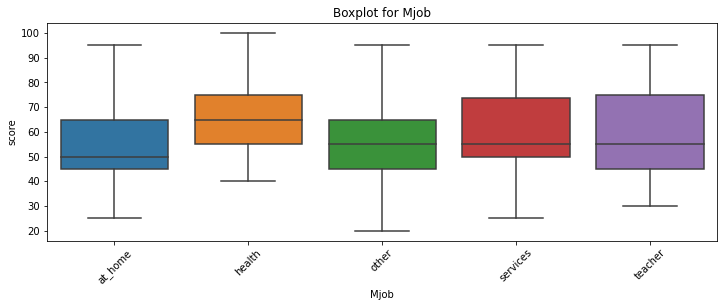

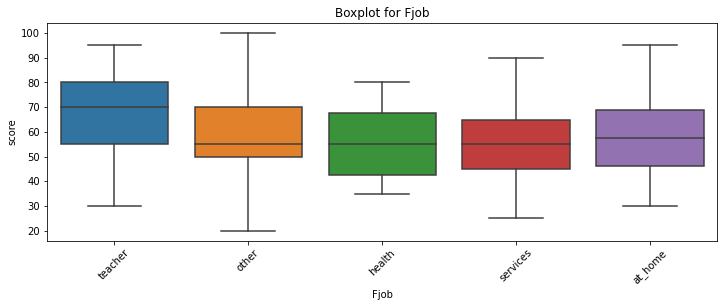

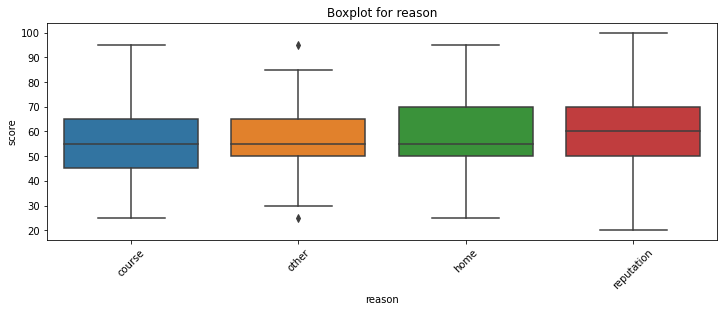

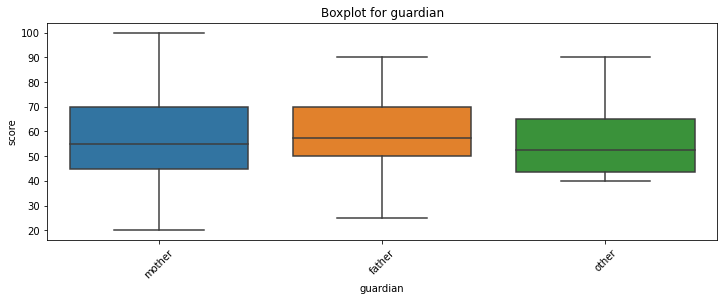

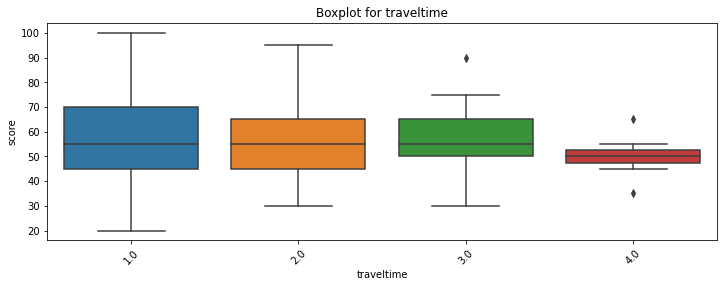

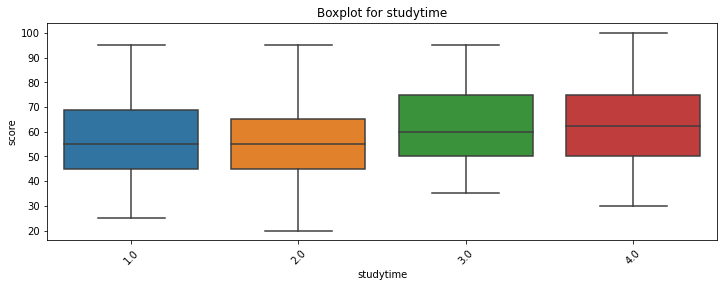

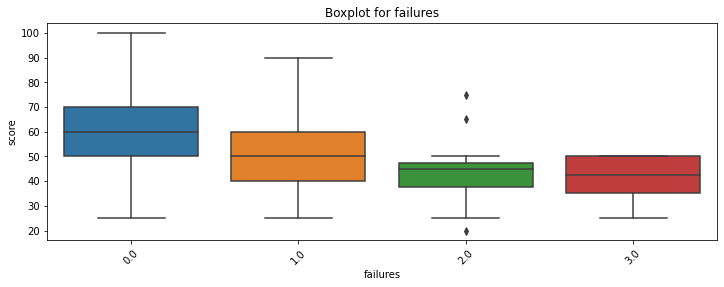

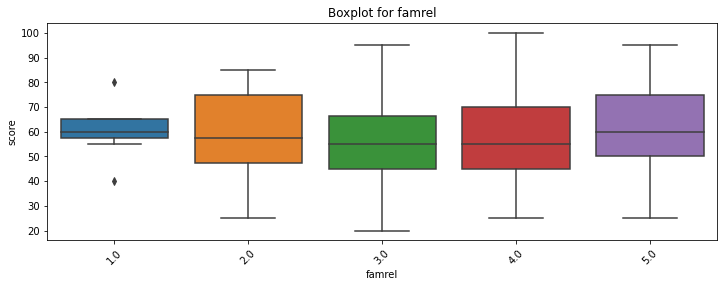

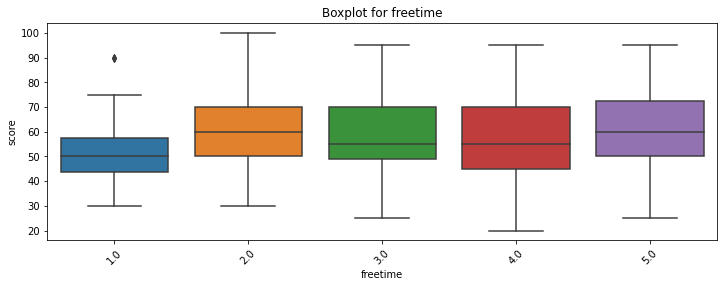

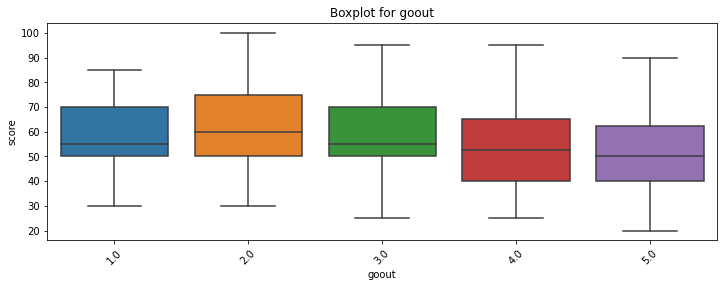

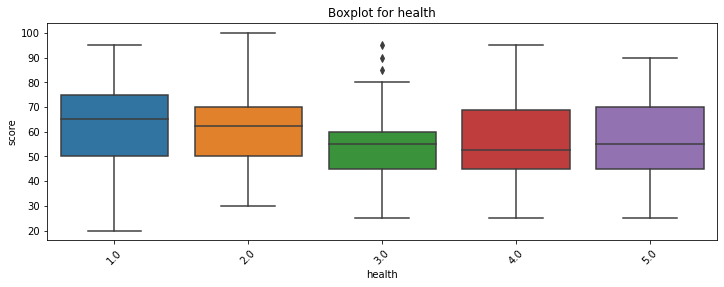

In [85]:
list_of_rating_columns = ('Medu', 'Fedu', 'Mjob', 'Fjob',
                          'reason', 'guardian', 'traveltime', 'studytime',
                          'failures', 'famrel', 'freetime', 'goout', 'health')
for col in list_of_rating_columns:
    get_boxplot(col)

In [86]:
def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        ttest = ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'].dropna(),
                          math.loc[math.loc[:, column] == comb[1], 'score'].dropna()).pvalue
        if ttest <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('!!!Найдены статистически значимые различия для колонки', column)
            break

In [87]:
list_of_all_columns = []
list_of_all_columns.extend(list_of_binary_columns)
list_of_all_columns.extend(list_of_rating_columns)
for elem in list_of_all_columns:
    get_stat_dif(elem)

!!!Найдены статистически значимые различия для колонки address
!!!Найдены статистически значимые различия для колонки schoolsup
!!!Найдены статистически значимые различия для колонки Medu
!!!Найдены статистически значимые различия для колонки Fedu
!!!Найдены статистически значимые различия для колонки Mjob
!!!Найдены статистически значимые различия для колонки Fjob
!!!Найдены статистически значимые различия для колонки studytime
!!!Найдены статистически значимые различия для колонки failures
!!!Найдены статистически значимые различия для колонки goout


In [88]:
def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        ttest = ttest_ind(math.loc[math.loc[:, column] == comb[0], 'zero_result'].dropna(),
                          math.loc[math.loc[:, column] == comb[1], 'zero_result'].dropna()).pvalue
        if ttest <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('!!!Найдены статистически значимые различия для колонки', column)
            break

In [89]:
for elem in list_of_all_columns:
    get_stat_dif(elem)

!!!Найдены статистически значимые различия для колонки paid
!!!Найдены статистически значимые различия для колонки higher
!!!Найдены статистически значимые различия для колонки romantic
!!!Найдены статистически значимые различия для колонки failures


In [90]:
math_model = math.loc[:, ['age', 'absences', 'address', 'schoolsup',
                          'Medu', 'Fedu', 'Mjob', 'Fjob',
                          'studytime', 'failures', 'goout', 'paid',
                          'higher', 'romantic', 'score', 'zero_result']]

In [91]:
math_model.head()

,age,absences,address,schoolsup,Medu,Fedu,Mjob,Fjob,studytime,failures,goout,paid,higher,romantic,score,zero_result
0,18.0,6.0,U,yes,4.0,4.0,at_home,teacher,2.0,0.0,4.0,no,yes,no,30.0,0.0
1,17.0,4.0,U,no,1.0,1.0,at_home,other,2.0,0.0,3.0,no,yes,no,30.0,0.0
2,15.0,10.0,U,yes,1.0,1.0,at_home,other,2.0,3.0,2.0,no,yes,no,50.0,0.0
3,15.0,2.0,U,no,4.0,2.0,health,other,3.0,0.0,2.0,yes,yes,yes,75.0,0.0
4,16.0,4.0,U,no,3.0,3.0,other,other,2.0,0.0,2.0,yes,yes,no,50.0,0.0


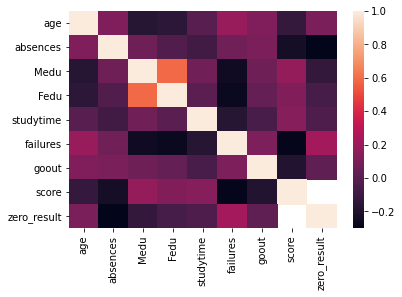

In [92]:
sns.heatmap(math_model.corr())

In [93]:
pd.DataFrame(math_model.corr().iloc[-2, :-2])

,score
age,-0.121579
absences,-0.227562
Medu,0.184533
Fedu,0.125396
studytime,0.139605
failures,-0.286925
goout,-0.179913


In [94]:
#Итог: Сильной корреляции между переменными нет, данные подходят для анализа

In [95]:
#Выводы:
#Мы провели EDA для построения будущей модели. В результате предварительного анализа мы пришли к сдежующим выводам:

#Всего у нас было 395 строк и 30 столбцов, в которых было достаточно пропусков. Заполнили мы их преимущественно медианой и модой
#Стообец studytime, granular был линейной комбинацией studytime, поэтому мы его убрали
#В некоторых столбцах были выбросы, которые мы устранили
#В столбце score было много нулевых результатов, поэтому мы выделили их в отдельный столбец zrro_result
#Корреляционный анализ показал следующие результаты:

#отрицательная корреляция параметра age и score может говорить о том, что чем выше возраст тем ниже score
#отрицательная корреляция параметра failures и score может говорить о том, что чем больше неудач по другим предметам тем ниже score
#отрицательная корреляция параметра goout и score может говорить о том, что чем больше ученик проводит времени с друзьями тем ниже score
#положительная корреляция по парамметру Medu, Fedu и score говорит о том, что чем выше лучше образование матери или отца, тем выше score
#положительная корреляция по парамметру studytime и score говорит о том, что чем больше ученик готовится к экзамену, тем выше score
#Самое интересное, что существует отрицательная корреляция между schoolsup и score. Интересно узнать, почему. Возможно, что дети больше расслабляются, когда им всё на блюдечке
#Мы выбрали 14 cамых важных параметров в дальнейшем для построения модели, это: age, absences, address, schoolsup, m_edu, f_edu, m_job, f_job, studytime, failures, goout, paid, higher, romantic.